# Lung Histopathological Image Analysis Using Deep Neural Networks

Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import LabelBinarizer
from tensorflow. keras.layers import Dense, GlobalAveragePooling2D, Dropout, MaxPooling2D , Conv2D, Flatten
from tensorflow.keras.models import Sequential
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from glob import glob

In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [6]:
"""import splitfolders

input_folder = 'D:/Andrew/Lung Histology/lung_image_sets'
splitfolders.ratio(input_folder, output='lung tissue',
                  seed=42, ratio=(.8, .2),
                  group_prefix=None)"""

"import splitfolders\n\ninput_folder = 'D:/Andrew/Lung Histology/lung_image_sets'\nsplitfolders.ratio(input_folder, output='lung tissue',\n                  seed=42, ratio=(.8, .2),\n                  group_prefix=None)"

In [7]:
train_dir = "D:/Andrew/L15000/lung tissue/train"
test_dir = "D:/Andrew/L15000/lung tissue/test"

Data Exploration

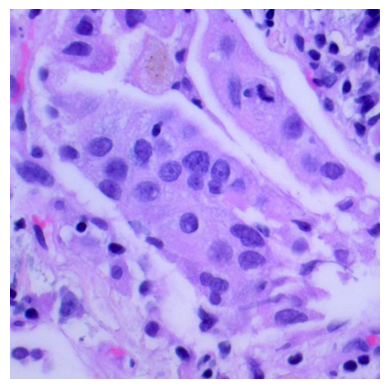

In [8]:
img = load_img("D:/Andrew/L15000/lung tissue/train/lung_aca/lungaca5.jpeg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [9]:
SEED = 12
IMG_HEIGHT = 768
IMG_WIDTH = 768
BATCH_SIZE = 32
EPOCHS = 5
LR = 0.00003
cancer_categories=os.listdir(train_dir)
n=len(cancer_categories)
print("Number of cancer categories : " ,n)

Number of cancer categories :  3


In [10]:
cancer={}
train=test=0
for clss in cancer_categories:
    num=len(os.listdir(os.path.join(train_dir,clss)))
    train+=num
    test+=len(os.listdir(os.path.join(test_dir,clss)))
    
    cancer[clss]=num

In [11]:
import plotly.express as px
%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

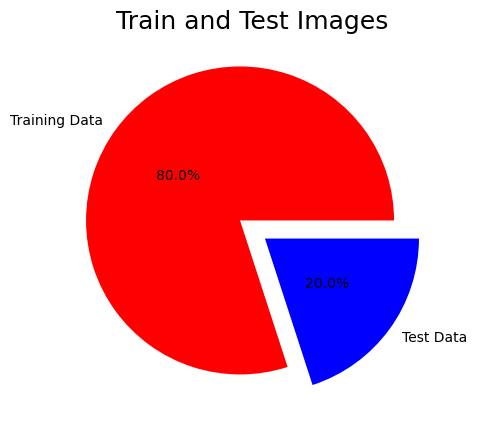

In [12]:
plt.figure(figsize=(8,5))
plt.pie(x=np.array([train,test]),autopct="%.1f%%", explode=[0.1,0.1], labels=["Training Data","Test Data"], pctdistance=0.5,colors=['red','blue'])
plt.title("Train and Test Images", fontsize=18);

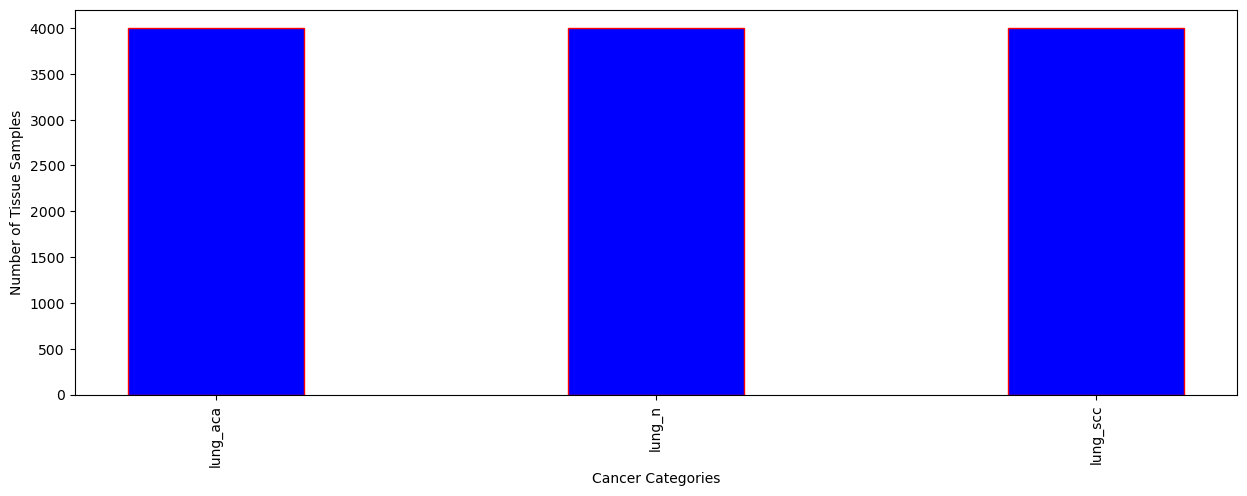

In [13]:
plt.figure(figsize= (15,5))
plt.bar(list(cancer.keys()), list(cancer.values()), width=0.4,align="center", edgecolor=['red'],color=['blue'])
plt.xticks(rotation=90)

plt.xlabel("Cancer Categories")
plt.ylabel("Number of Tissue Samples") 
plt.show()

In [14]:
train_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=(768,768),
    shuffle=True,
    seed=SEED,
    validation_split=0.2,
    subset="training",
)

Found 12000 files belonging to 3 classes.
Using 9600 files for training.


In [15]:
val_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=(768,768),
    shuffle=True,
    seed=SEED,
    validation_split=0.2,
    subset="validation",
)

Found 12000 files belonging to 3 classes.
Using 2400 files for validation.


In [16]:
test_set=image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    class_names=None,
    batch_size=BATCH_SIZE,
    image_size=(768,768),
    shuffle=False,
    seed=SEED,
)

Found 3000 files belonging to 3 classes.


In [17]:
def transfer_learning():
    base_model=DenseNet121(include_top=False, input_shape=None, weights="imagenet")

    thr=149
    for layers in base_model.layers[:thr]:
        layers.trainable=False
    for layers in base_model.layers[thr:]:
        layers.trainable=False
        
    return base_model

In [18]:
def create_model():
    model=Sequential()

    base_model=transfer_learning()
    model.add(base_model)

    model.add(GlobalAveragePooling2D())

    model.add(Dense(256, activation="relu")) 
    model.add(Dropout (0.2))
    
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    
    model.add(Dense(1024, activation="relu"))
    
    model.add(Dense(n,activation="softmax"))
    
    model.summary ()
    
    return model

In [19]:
model=create_model()

model.compile(optimizer="adam",
               loss='categorical_crossentropy',
               metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, None, None, 1024)  7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

In [20]:
history = model.fit(x = train_set,validation_data=val_set, epochs = EPOCHS)

Epoch 1/5
300/300 [==============================] - 5912s 20s/step - loss: 0.6523 - accuracy: 0.8360 - val_loss: 0.2609 - val_accuracy: 0.8821
Epoch 2/5
300/300 [==============================] - 5479s 18s/step - loss: 0.2858 - accuracy: 0.8834 - val_loss: 0.2374 - val_accuracy: 0.8938
Epoch 3/5
300/300 [==============================] - 5510s 18s/step - loss: 0.2759 - accuracy: 0.8919 - val_loss: 0.2061 - val_accuracy: 0.9200
Epoch 4/5
300/300 [==============================] - 6225s 21s/step - loss: 0.2408 - accuracy: 0.8990 - val_loss: 0.1898 - val_accuracy: 0.9337
Epoch 5/5
300/300 [==============================] - 5706s 19s/step - loss: 0.2430 - accuracy: 0.9039 - val_loss: 0.1876 - val_accuracy: 0.9300


In [21]:
model.save('cancer.h5')

Model Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


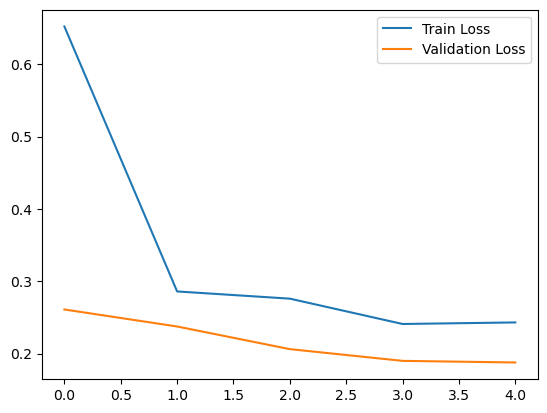

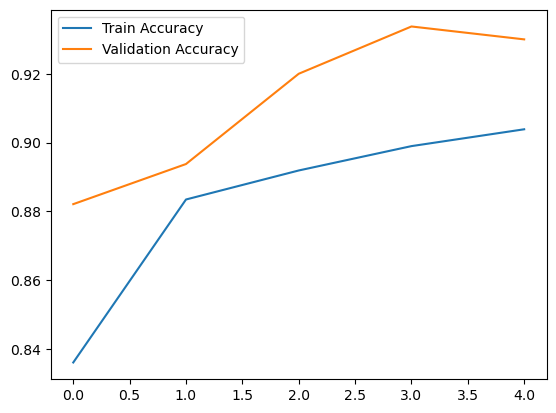

In [25]:
print(history.history.keys())
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.show()

Model Testing

In [27]:
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing import image

In [28]:
img1 = image.load_img('D:/Andrew/L15000/lung tissue/train/lung_aca/lungaca5.jpeg')
x = image.img_to_array(img1)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['lung_aca','lung_n','lung_scc']
op[pred]

1/1 [==============================] - 8s 8s/step


'lung_aca'

In [29]:
img1 = image.load_img('D:/Andrew/L15000/lung tissue/train/lung_n/lungn57.jpeg')
x = image.img_to_array(img1)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['lung_aca','lung_n','lung_scc']
op[pred]

1/1 [==============================] - 1s 832ms/step


'lung_n'

In [31]:
img1 = image.load_img('D:/Andrew/L15000/lung tissue/test/lung_scc/lungscc2064.jpeg')
x = image.img_to_array(img1)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['lung_aca','lung_n','lung_scc']
op[pred]

1/1 [==============================] - 4s 4s/step


'lung_scc'